In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [10]:
#load the data set to be analyze; the data set is loaded to the object dataframe named 'df' (this is user-defined)
dataSet = pd.read_csv('C:/Users/johnp/Programming/Artificial Intelligence and Machine Learning/Projects/Dataset/insurance.csv')
df =pd.DataFrame(dataSet)

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.drop(columns=["sex","smoker","region"],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


<Axes: >

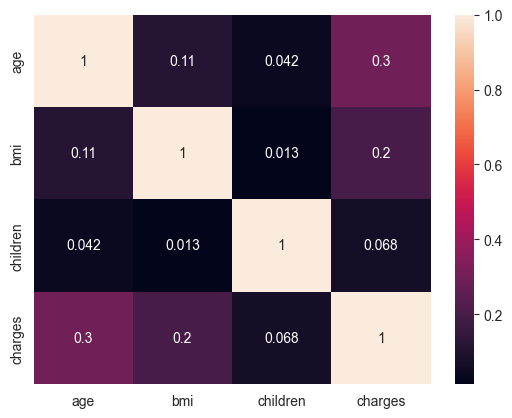

In [14]:
sns.heatmap(df.corr(),annot=True)

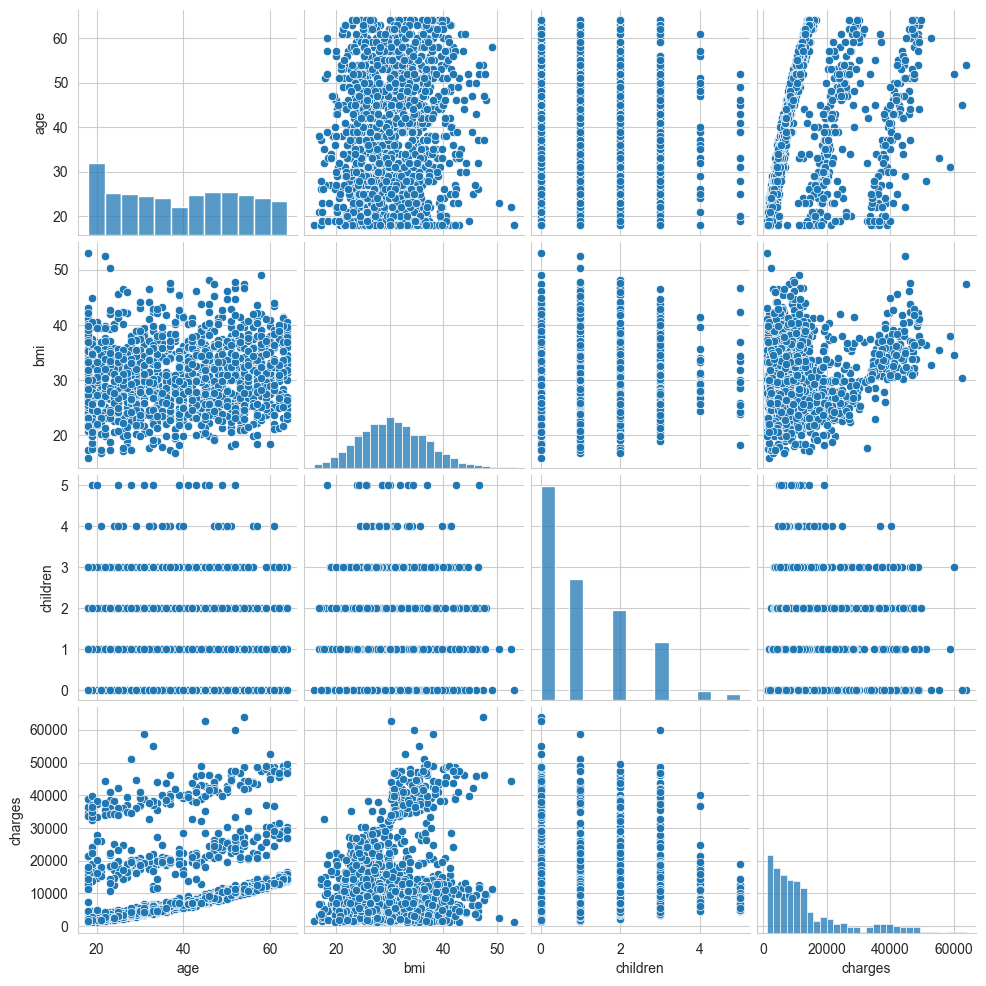

In [15]:
#perform Exploratory Data Analysis using seaborn pairplot
sns.pairplot(df)

In [16]:
print(df.columns)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [20]:
x = df.drop(['charges'],axis=1)
y = df['charges']

In [21]:
x

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [24]:
#split the normalized data using 60:40 as the ratio; but note that in model training 80:20 is recommended
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [26]:
print("Training set x: ", x_train.shape)
print("Testing set x:", x_test.shape)
print("Training set y: ", y_train.shape)
print("Testing set y:", y_test.shape)

Training set x:  (1070, 3)
Testing set x: (268, 3)
Training set y:  (1070,)
Testing set y: (268,)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
#It calculates the coefficients (weights) and the intercept of the regression equation:
lm.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
#get the intercept
intercept = lm.intercept_

#display the Intercept
print (f"Intercept : {intercept: .2f}")

Intercept : -7778.09


In [31]:
#get the slope of each independent variable (features)
coeff_df= pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

          Coefficient
age        245.674228
bmi        354.792582
children   430.018157


In [32]:
#Predict house price using the training data
y_pred_train = lm.predict(x_train)
y_pred_train
#print(len(y_pred_train))

array([ 9495.50238865, 14676.47151477,  7328.6263297 , ...,
       14334.96401975, 14638.65624072, 15638.07722142], shape=(1070,))

In [33]:
print (y_pred_train[0])

9495.502388649971


In [34]:
y_pred_test = lm.predict(x_test)
y_pred_test

array([12443.85874985, 10604.78239432, 20309.51401919, 16106.23748419,
        8581.71514075, 13948.43645501, 14052.35033135,  7088.04723668,
       12399.54008132, 10757.75704356,  6667.43054331,  8822.14601984,
       12021.15433286, 15347.75749282, 17184.89433865, 15489.80500811,
       10853.18533725, 23110.18721566, 15630.02661777, 11439.26409434,
       14584.3432532 ,  9360.68120753,  5980.41451851, 11660.97018812,
        9366.37766538, 17839.43851664, 17054.41875574, 14395.77113751,
       11603.38416412, 12273.85473839,  3914.61507549, 15187.4209683 ,
       14556.10806057, 11744.94776773, 13592.10552964, 17057.25641468,
       18104.58706675, 18017.85923371, 14212.74806282, 13612.93071139,
       20773.49462908, 14364.97317528, 10234.02414624, 15974.41104164,
       11240.21454506, 12258.7171488 , 11007.08814141, 14505.12511083,
       15480.06784706, 15080.09811583, 13469.81989861, 10847.97239254,
       15663.78004865, 18622.32707837, 16365.3931486 , 18408.84134067,
      

In [35]:
#Compute and display the predicted against the actual
y_pred_df = pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': y_pred_test, 'Difference': y_test-y_pred_test})
y_pred_df[0:20]

,Actual Cost,Predicted Cost,Difference
7,7281.50560,12443.858750,-5162.353150
999,5267.81815,10604.782394,-5336.964244
1209,12347.17200,20309.514019,-7962.342019
491,24513.09126,16106.237484,8406.853776
625,3736.46470,8581.715141,-4845.250441
228,7358.17565,13948.436455,-6590.260805
425,9788.86590,14052.350331,-4263.484431
261,17085.26760,7088.047237,9997.220363
498,8211.10020,12399.540081,-4188.439881
896,19798.05455,10757.757044,9040.297506


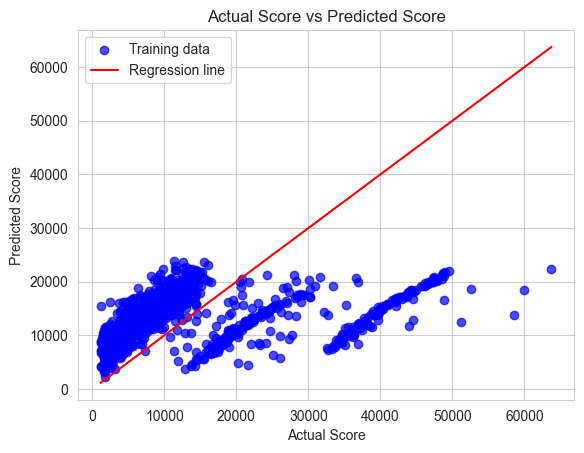

In [36]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_train, label= 'Training data',color='b', alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r', label='Regression line')


plt.legend()
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual Score vs Predicted Score')
plt.show()

In [37]:
from sklearn.metrics import r2_score

print(f"Train R2: { r2_score(y_train, y_pred_train):.2f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.2f}")

Train R2: 0.13
Test R2: 0.07


<Axes: xlabel='charges'>

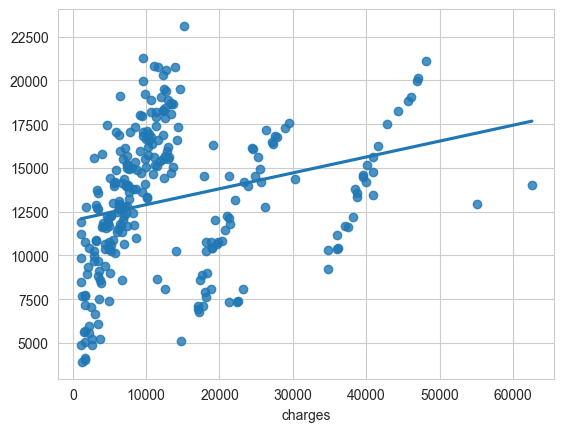

In [38]:
#visualize the price using the testing versus predicted data
#plot a regression line
import seaborn as sns
sns.regplot(x=y_test,y= y_pred_test, ci=None)